In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv('Graduate Admissions.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Question 1

Text(0, 0.5, 'Chance of Admission')

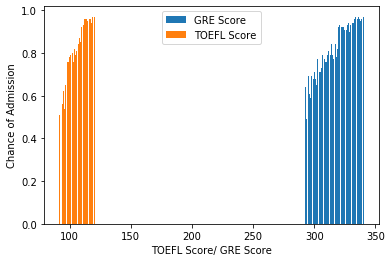

In [268]:
#1
plt.bar(data['GRE Score'],data['Chance of Admit'], label='GRE Score')
plt.bar(data['TOEFL Score'],data['Chance of Admit'], label = 'TOEFL Score')
plt.legend(loc='upper center')
plt.xlabel('TOEFL Score/ GRE Score')
plt.ylabel('Chance of Admission')

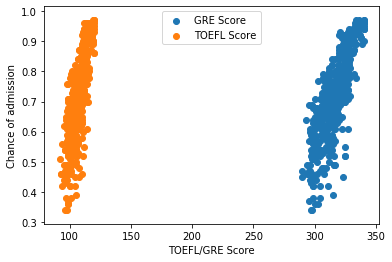

In [105]:
plt.scatter(data['GRE Score'],data['Chance of Admit'],label = 'GRE Score')
plt.scatter(data['TOEFL Score'],data['Chance of Admit'],label = 'TOEFL Score')
plt.xlabel("TOEFL/GRE Score")
plt.ylabel("Chance of admission")
plt.legend(loc = 'upper center')

In [313]:
print(data['GRE Score'].corr(data['Chance of Admit']))
print(data['TOEFL Score'].corr(data['Chance of Admit']))

0.8103506354632607
0.7922276143050835


## Question 2

In [4]:
#2
df_no_research = data.loc[data['Research']==0]
df_research = data.loc[data['Research']==1]

Text(-15, 15, 'Average GRE Score without Research:309.30')

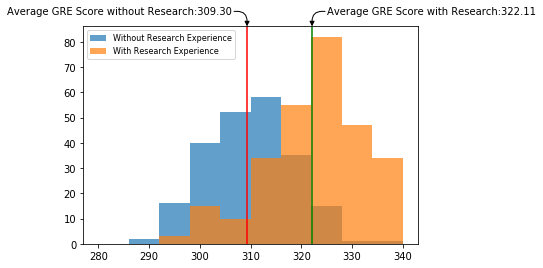

In [97]:
plt.hist(df_no_research['GRE Score'], bins = 10, range = (280,340),alpha = 0.7,label = 'Without Research Experience')
plt.axvline(df_no_research['GRE Score'].mean(), color='red')
plt.hist(df_research['GRE Score'], bins = 10, range = (280,340), alpha = 0.7, label = 'With Research Experience')
plt.axvline(df_research['GRE Score'].mean(), color='green')
plt.legend( bbox_to_anchor = (0,1),loc = 'upper left', prop={'size':8})

plt.annotate('Average GRE Score with Research:{:.2f}'.format(df_research['GRE Score'].mean()), xy = (df_research['GRE Score'].mean(),1), xycoords=('data', 'axes fraction'),xytext=(15, 15),textcoords='offset points',
            horizontalalignment='left', verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

plt.annotate('Average GRE Score without Research:{:.2f}'.format(df_no_research['GRE Score'].mean()), xy = (df_no_research['GRE Score'].mean(),1), xycoords=('data', 'axes fraction'),xytext=(-15, 15),textcoords='offset points',
            horizontalalignment='right', verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))


Text(-15, 15, 'Average TOEFL Score without Research:103.99')

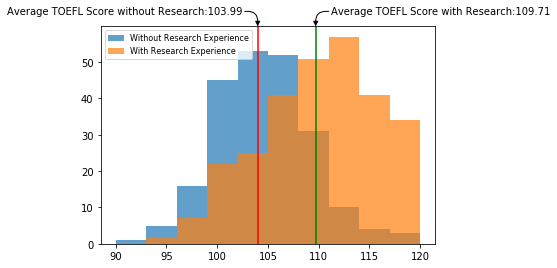

In [96]:
plt.hist(df_no_research['TOEFL Score'], bins = 10, range = (90,120),alpha = 0.7,label = 'Without Research Experience')
plt.axvline(df_no_research['TOEFL Score'].mean(), color='red')
plt.hist(df_research['TOEFL Score'], bins = 10, range = (90,120), alpha = 0.7, label = 'With Research Experience')
plt.axvline(df_research['TOEFL Score'].mean(), color='green')
plt.legend( bbox_to_anchor = (0,1),loc = 'upper left', prop={'size':8})

plt.annotate('Average TOEFL Score with Research:{:.2f}'.format(df_research['TOEFL Score'].mean()), xy = (df_research['TOEFL Score'].mean(),1), xycoords=('data', 'axes fraction'),xytext=(15, 15),textcoords='offset points',
            horizontalalignment='left', verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

plt.annotate('Average TOEFL Score without Research:{:.2f}'.format(df_no_research['TOEFL Score'].mean()), xy = (df_no_research['TOEFL Score'].mean(),1), xycoords=('data', 'axes fraction'),xytext=(-15, 15),textcoords='offset points',
            horizontalalignment='right', verticalalignment='center',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0,
                            connectionstyle='angle,angleA=0,angleB=90,rad=10'))

In [7]:
data.columns = data.columns.str.strip()

## Question 3

In [109]:
#3 ( check the histograms in the end of q3 and make them more presentable, also think of new ways of finding that correlation)

In [151]:
print(data['University Rating'].corr(data['LOR']))
print(data['University Rating'].corr(data['SOP']))

0.6086507072838138
0.7280235718785818


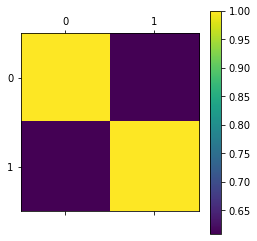

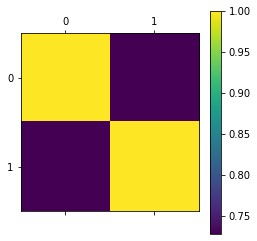

In [281]:
plt.matshow(data[['University Rating','LOR']].corr())
plt.colorbar()
plt.matshow(data[['University Rating','SOP']].corr())
plt.colorbar()

In [155]:
data_univs = []  #list of 5 datasets divided on the basis of university ratings. 
for i in range(1,6):
    data_univs.append(data.loc[data['University Rating']==i])

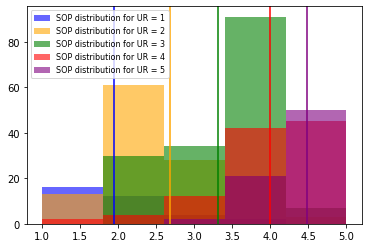

In [302]:
n_bins = 5
j=1
align = 'right'
color = ['blue','orange','green','red','purple']
for i in data_univs:
    if j > 2:
        align='left'
    plt.hist(i['SOP'],bins = n_bins, range=(1,5), alpha = 0.6,label = 'SOP distribution for UR = {}'.format(j),color=color[j-1])
    plt.axvline(i['SOP'].mean(),color=color[j-1])
    #plt.annotate('Mean={:.2f}'.format(i['LOR'].mean()),xy=(i['LOR'].mean(),1.01), xycoords = ('data','axes fraction') )
    j = j+1
plt.legend(prop={'size':8})

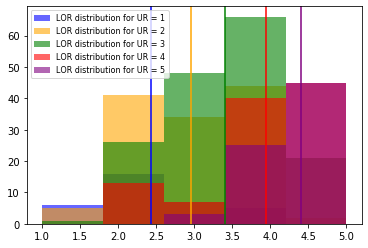

In [159]:
n_bins = 5
j=1
color = ['blue','orange','green','red','purple']
for i in data_univs:
    plt.hist(i['LOR'],bins = n_bins, range=(1,5), alpha = 0.6,label = 'LOR distribution for UR = {}'.format(j),color=color[j-1])
    plt.axvline(i['LOR'].mean(),color=color[j-1])
    #plt.annotate('Mean={:.2f}'.format(i['LOR'].mean()),xy=(i['LOR'].mean(),69),horizontalalignment='right')
    j = j+1
plt.legend(prop={'size':8})

## Question 4

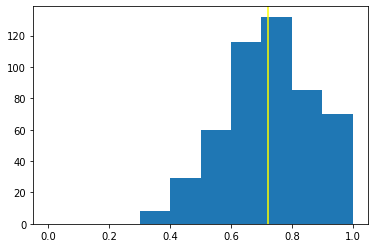

In [314]:
#4 
plt.hist(data['Chance of Admit'], bins = 10, range=(0,1))
plt.axvline(data['Chance of Admit'].mean(), color = 'yellow')

In [315]:
df_accepted = data.loc[data['Chance of Admit']>=0.7]
df_accepted.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
5,6,330,115,5,4.5,3.0,9.34,1,0.90


Text(0.5, 0, 'LOR')

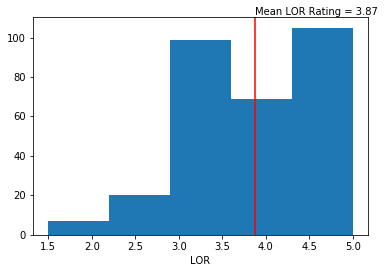

In [311]:
plt.hist(df_accepted['LOR'], bins=5)
plt.axvline(df_accepted['LOR'].mean(),color='red')
plt.annotate('Mean LOR Rating = {:.2f}'.format(df_accepted['LOR'].mean()), xy=(df_accepted['LOR'].mean(),1.01),xycoords=('data', 'axes fraction'))
plt.xlabel('LOR')

Text(0.5, 0, 'SOP')

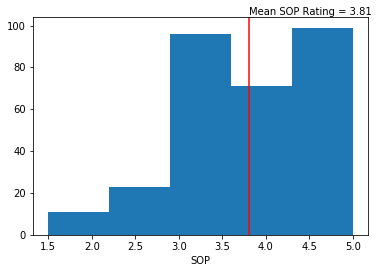

In [312]:
plt.hist(df_accepted['SOP'], bins=5)
plt.axvline(df_accepted['SOP'].mean(),color='red')
plt.annotate('Mean SOP Rating = {:.2f}'.format(df_accepted['SOP'].mean()), xy=(df_accepted['SOP'].mean(),1.01),xycoords=('data', 'axes fraction'))
plt.xlabel('SOP')

In [283]:
print('The average LOR Rating for Chance of Admission greater than 50% - {:.2f}'.format(df_accepted['LOR'].mean()))
print('The average SOP Rating for Chance of Admission greater than 50% - {:.2f}'.format(df_accepted['SOP'].mean()))

The average LOR Rating for Chance of Admission greater than 50% - 3.87
The average SOP Rating for Chance of Admission greater than 50% - 3.81


## Question 5

In [164]:
#5
data['Chance of Admit'].corr(data['University Rating'])

0.6901323687886896

Text(0, 0.5, 'Chance Of Admission')

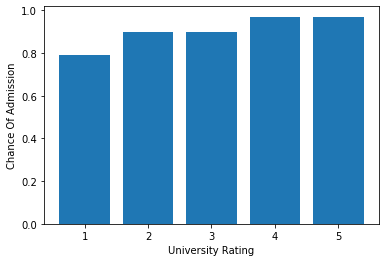

In [316]:
b = plt.bar(data['University Rating'],data['Chance of Admit'])
plt.xlabel('University Rating')
plt.ylabel('Chance Of Admission')

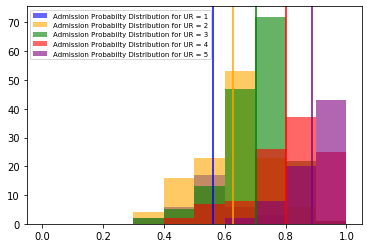

In [169]:
bin_no = 10
j = 1
for i in data_univs:
    plt.hist(i['Chance of Admit'], bins = bin_no, range = (0,1),color = color[j-1], alpha = 0.6, label = 'Admission Probabilty Distribution for UR = {}'.format(j))
    plt.axvline(i['Chance of Admit'].mean(),color = color[j-1])
    j=j+1
plt.legend(prop={'size':7})

## Question 6

In [318]:
#6
df_90_chance = data.loc[data['Chance of Admit']==0.9]
df_90_chance.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
5,6,330,115,5,4.5,3.0,9.34,1,0.9
33,34,340,114,5,4.0,4.0,9.60,1,0.9
98,99,332,119,4,5.0,4.5,9.24,1,0.9
141,142,332,118,2,4.5,3.5,9.36,1,0.9
176,177,329,119,4,4.5,4.5,9.16,1,0.9


In [290]:
print('The Range of GRE Scores for 90% admission probability = {} to {}'.format(df_90_chance['GRE Score'].min(),df_90_chance['GRE Score'].max()))
print('The Range of TOEFL Scores for 90% admission probability = {} to {}'.format(df_90_chance['TOEFL Score'].min(),df_90_chance['TOEFL Score'].max()))
print('The Range of SOP Rating for 90% admission probability = {} to {}'.format(df_90_chance['SOP'].min(),df_90_chance['SOP'].max()))
print('The Range of LOR Rating for 90% admission probability = {} to {}'.format(df_90_chance['LOR'].min(),df_90_chance['LOR'].max()))
print('The Range of CGPA for 90% admission probability = {} to {}'.format(df_90_chance['CGPA'].min(),df_90_chance['CGPA'].max()))

The Range of GRE Scores for 90% admission probability = 324 to 340
The Range of TOEFL Scores for 90% admission probability = 111 to 119
The Range of SOP Rating for 90% admission probability = 4.0 to 5.0
The Range of LOR Rating for 90% admission probability = 3.0 to 4.5
The Range of CGPA for 90% admission probability = 9.16 to 9.6


In [291]:
print('The Average GRE Score for 90% admission probability = {:.2f}'.format(df_90_chance['GRE Score'].mean()))
print('The Average TOEFL Score for 90% admission probability = {:.2f}'.format(df_90_chance['TOEFL Score'].mean()))
print('The Average SOP rating for 90% admission probability = {:.2f}'.format(df_90_chance['SOP'].mean()))
print('The Average LOR rating for 90% admission probability = {:.2f}'.format(df_90_chance['LOR'].mean()))
print('The Average CGPA for 90% admission probability = {:.2f}'.format(df_90_chance['CGPA'].mean()))

The Average GRE Score for 90% admission probability = 330.56
The Average TOEFL Score for 90% admission probability = 116.11
The Average SOP rating for 90% admission probability = 4.50
The Average LOR rating for 90% admission probability = 4.11
The Average CGPA for 90% admission probability = 9.32


In [ ]:
#7 - How does the GPA influence your chance of admission?
#8 - The ratio of people in different rated univs with and without research experience. 
#9 - How does the GPA Influence the GRE and TOEFL Scores? 
#10 - Inspite of having good GRE and TOEFL scores, how many students still had chance of admit less than 60/50/70%? 
# First of all decide the 'good' GRE score and then analyse that these students lacked Research experience/GPA/UR too high, and hence they had very less chance of acceptance. 

## Question 7

Text(0, 0.5, 'Chance of Admission')

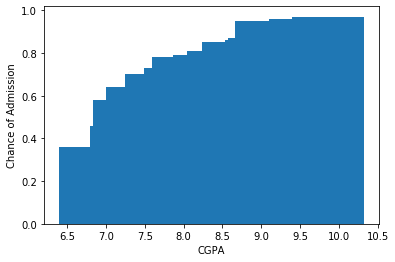

In [180]:
plt.bar(data['CGPA'],data['Chance of Admit'])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')

Text(0, 0.5, 'Chance of Admission')

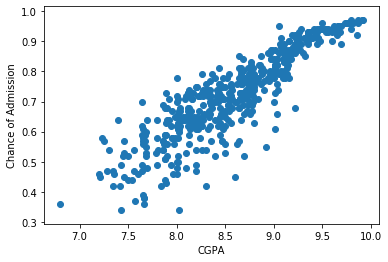

In [181]:
plt.scatter(data['CGPA'],data['Chance of Admit'])
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')

In [185]:
data['CGPA'].corr(data['Chance of Admit'])

0.8824125749045743

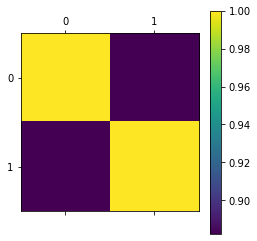

In [187]:
plt.matshow(data[['CGPA','Chance of Admit']].corr())
plt.colorbar()

## Question 8

Text(0, 0.5, 'GRE Score')

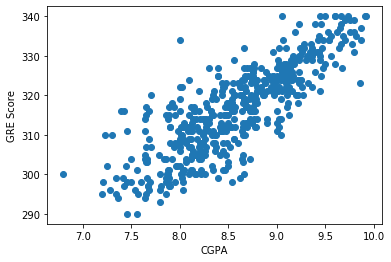

In [292]:
plt.scatter(data['CGPA'], data['GRE Score'])
plt.xlabel('CGPA')
plt.ylabel('GRE Score')

Text(0, 0.5, 'TOEFL Score')

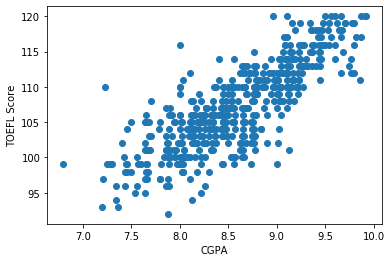

In [293]:
plt.scatter(data['CGPA'], data['TOEFL Score'])
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')

In [263]:
print(data['CGPA'].corr(data['GRE Score']))
print(data['CGPA'].corr(data['TOEFL Score']))

0.8258779536403551
0.8105735363036222


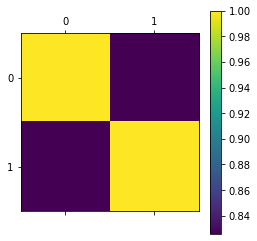

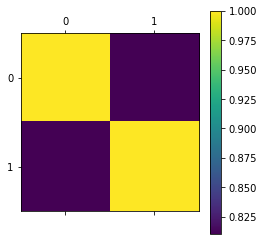

In [265]:
plt.matshow(data[['CGPA','GRE Score']].corr())
plt.colorbar()
plt.matshow(data[['CGPA','TOEFL Score']].corr())
plt.colorbar()

## Question 9

Text(0, 0.5, 'Ratio of people with research experience to without research experience')

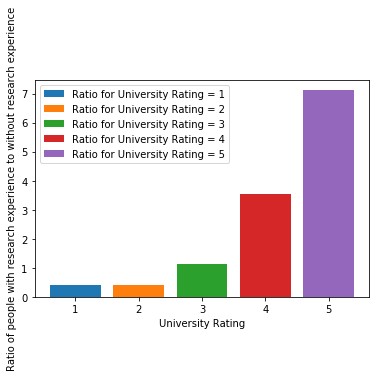

In [294]:
j = 1
for i in data_univs:
    r = i['Research'].value_counts()
    plt.bar(j, (r[1]/r[0]), label = 'Ratio for University Rating = {}'.format(j))
    j = j+1
plt.legend()
plt.xlabel('University Rating')
plt.ylabel('Ratio of people with research experience to without research experience')

## Question 10

In [234]:
x = data['GRE Score'].mean()
y = data['TOEFL Score'].mean()
z = data['Chance of Admit'].mean()
z

0.7217399999999996

In [304]:
df_failures = data.loc[(data['GRE Score']>=x)&(data['TOEFL Score']>=y)&(data['Chance of Admit']<=z)]
len(df_failures)

21

Text(0, 0.5, 'Number of Students')

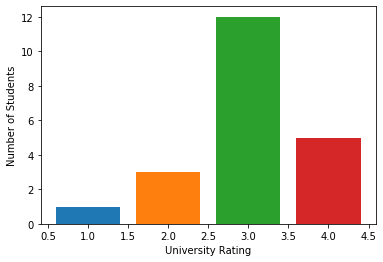

In [305]:
c = df_failures['University Rating'].value_counts()
for j in range(1,5):
    plt.bar(j, c[j])
plt.xlabel('University Rating')
plt.ylabel('Number of Students')

Text(8.63142857142857, 1.01, 'Mean CGPA = 8.63')

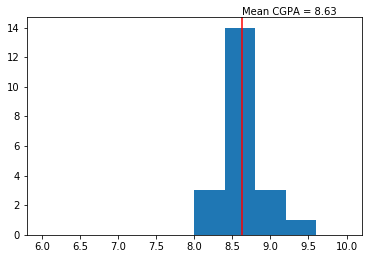

In [299]:
plt.hist(df_failures['CGPA'], bins = 10, range=(6,10))
plt.axvline(df_failures['CGPA'].mean(),color='red')
plt.annotate('Mean CGPA = {:.2f}'.format(df_failures['CGPA'].mean()), xy=(df_failures['CGPA'].mean(),1.01),xycoords=('data', 'axes fraction'))

Text(3.238095238095238, 1.01, 'Mean SOP Rating = 3.24')

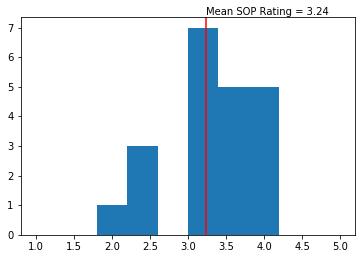

In [298]:
plt.hist(df_failures['SOP'],bins = 10, range=(1,5))
plt.axvline(df_failures['SOP'].mean(),color='red')
plt.annotate('Mean SOP Rating = {:.2f}'.format(df_failures['SOP'].mean()), xy=(df_failures['SOP'].mean(),1.01),xycoords=('data', 'axes fraction'))

Text(3.1904761904761907, 1.01, 'Mean LOR Rating = 3.19')

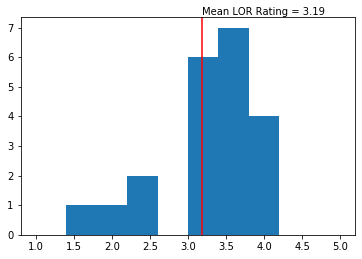

In [303]:
plt.hist(df_failures['LOR'], bins = 10, range=(1,5))
plt.axvline(df_failures['LOR'].mean(),color='red')
plt.annotate('Mean LOR Rating = {:.2f}'.format(df_failures['LOR'].mean()), xy=(df_failures['LOR'].mean(),1.01),xycoords=('data', 'axes fraction'))

In [255]:
r = df_failures['Research'].value_counts()
print('Ratio of people with and without Research experience = {:.2f}'.format(r[1]/r[0]))

Ratio of people with and without Research experience = 0.75
